We're focusing on collecting redox-active organic molecules, including their SMILES strings and experimentally measured redox potentials, from open sources such as databases, repositories, and papers

# Data collection

No questions arise about how to handle data from systematized and organized databases and repositories. However, we have discovered that information about experimental redox potentials is mainly presented in scientific papers and corresponding supplementary files. The most common way of representing molecules in these sources is through chemical 2D or 3D structures.

There are many different ways to extract the necessary data from papers. With a chemical name (non-systematic for well-known substances or IUPAC version) or a CAS number in hand, one can use the [CIRpy library [doc]](https://cirpy.readthedocs.io/en/latest/index.html) to get the SMILES string:

In [1]:
!pip install rdkit-pypi
!pip install Pillow
!pip install cirpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 24.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for cirpy: filename=CIRpy-1.0.2-py3-none-any.whl size=7263 sha256=18119d5f3e373a86e2868a1ca700720e004c7ec5b5dd87d4b09abe64ca04dbcc
  Stored in directory: /root/.cache/pip/wheels/c7/35/2b/f5d2226974fb5b1e84d53eda475d8b33a38548a6b25e32c2c0
Successfully built cirpy


In [3]:
import cirpy

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import MolsToGridImage

In [4]:
names_list = ['1,8-Diazabicyclo[5.4.0]undec-7-ene', 'Fluorene', '2-Naphthol', 'Norbornene']
cas_list = ['91-20-3', '203-12-3', '488-48-2', '103-30-0']
smiles_list = []

for name in names_list:
    smiles_string = cirpy.resolve(name, 'smiles')
    print(smiles_string)
    smiles_list.append(smiles_string)

for cas in cas_list:
    smiles_string = cirpy.resolve(cas, 'smiles')
    print(smiles_string)
    smiles_list.append(smiles_string)

C1CCN2CCCN=C2CC1
C1c2ccccc2c3ccccc13
Oc1ccc2ccccc2c1
C1CC2CC1C=C2
c1ccc2ccccc2c1
c1cc2ccc3ccc4cccc5c(c1)c2c3c45
BrC1=C(Br)C(=O)C(=C(Br)C1=O)Br
c1ccc(cc1)\C=C\c2ccccc2


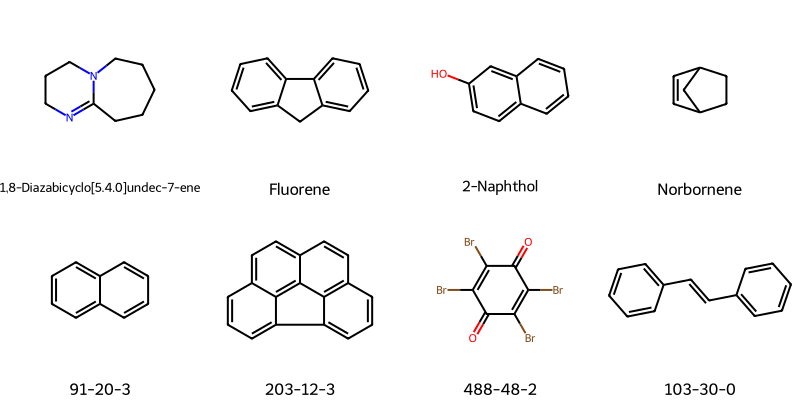

In [6]:
mols_list = []
for smiles_string in smiles_list:
    mols_list.append(Chem.MolFromSmiles(smiles_string))

MolsToGridImage(mols_list, molsPerRow=4, subImgSize=(200, 200), legends=(names_list + cas_list))

We also found that, in the absence of any annotations or labels on pictures of chemical structures, it is very convenient to use pretrained large language models. These can be general models like ([ChatGPT](https://chatgpt.com)) or specialized models for Chemistry and Molecular Science like ([ChemLLM](https://chemllm.org)).

Using a PDF page or even screenshots of chemical structures as input, one can get a list of SMILES strings of the corresponding structures as output:

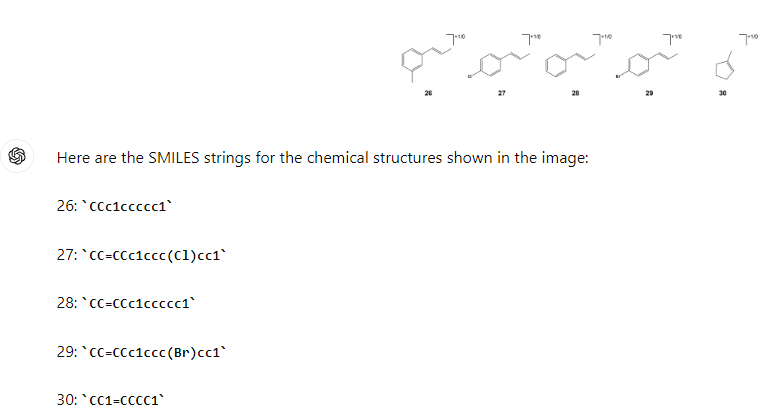

We had been collecting available information about experimental redox potential measurements and organic molecules (name, SMILES, oxidation or reduction potential value, solvent SMILES, and reference electrode). Along with the SMILES strings, the data was organized in a csv file.

Useful source for verifying and validating SMILES strings: [openmolecules.org](https://openmolecules.org/name2structure.html)